# **Deep Learning Project 5 - CIFAR Image Classification :**
---
- ### Write a program that takes the CIFAR100 dataset of 32 x 32 pixel images as input and uses the Convolutional Neural Networks (CNN) model and implements it with the TensorFlow library to classify images into one of 10 different classes based on the visual features present in the image.

- ### Your task is to preprocess the data, then define a CNN model architecture that can accurately classify images into their respective categories.

- ### To make sure your code is readable, you should add comments wherever necessary for proper understanding.
---
# **Importing necessary libraries :**

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Loading the CIFAR-10 dataset into training and testing sets, with images and corresponding labels :

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalizing the pixel values of the images to a range between 0 and 1 by dividing them by 255.0, which is the maximum pixel value :

In [18]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## **class_names** stores the names of the 10 image categories in CIFAR-10 dataset.

In [19]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Displaying the image at index 1234 from the train_images array using **Matplotlib** :

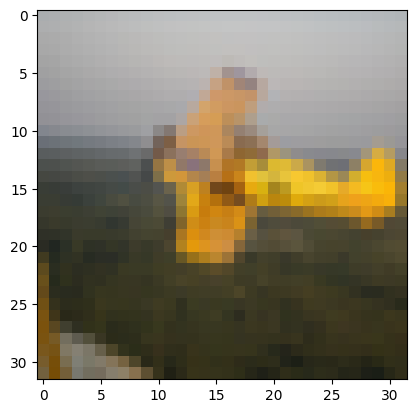

In [20]:
plt.imshow(train_images[1234])

## Below code defines a sequential CNN with multiple convolutional, pooling, and dense layers for the CIFAR image classification.

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', padding='same'))  # Added padding
model.add(layers.Conv2D(64, (3,3), activation = 'relu', padding='same'))  # Added layer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same')) # Added layer with more filters and padding
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same')) # Added layer with more filters and padding
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

## **model.summary()** displays a table containing the model's architecture, layer types, output shapes, and the number of parameters.

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 499,722 (1.91 MB)

 Trainable params: 499,722 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

## Below code  configures the model for training by specifying the optimizer, loss function, and evaluation metrics :

In [23]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

## Below code trains the defined CNN model using training data and evaluates it on validation data for 50 epochs, saving training metrics in 'history'.

In [24]:
history = model.fit(train_images, train_labels, epochs = 50,
                    validation_data = (test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3325 - loss: 1.7976 - val_accuracy: 0.5623 - val_loss: 1.2174
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5733 - loss: 1.1809 - val_accuracy: 0.6501 - val_loss: 0.9834
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6630 - loss: 0.9502 - val_accuracy: 0.6751 - val_loss: 0.9105
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7145 - loss: 0.8118 - val_accuracy: 0.7093 - val_loss: 0.8296
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7452 - loss: 0.7201 - val_accuracy: 0.7226 - val_loss: 0.8060
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7796 - loss: 0.6252 - val_accuracy: 0.7378 - val_loss: 0.7628
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8070 - loss: 0.5498 - val_accuracy: 0.7412 - val_loss: 0.7742
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8206 - loss: 0.50

## Below code plots the training and validation accuracy over epochs and then evaluates the model's performance on the test set, printing the loss and accuracy.

313/313 - 1s - 2ms/step - accuracy: 0.7390 - loss: 1.4200


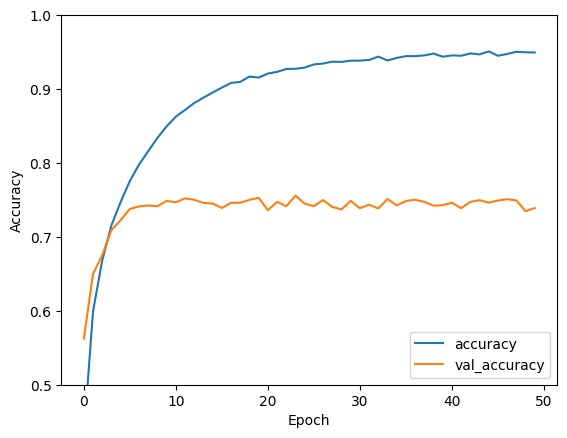

In [25]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)